In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
!pwd

/content


In [3]:
!cd /content/drive/MyDrive/Colab Notebooks/AkcigerKanseriSVM.ipynb

/bin/bash: line 0: cd: too many arguments


In [4]:
data=pd.read_csv("/content/drive/MyDrive/KNN_Bayes/lung_cancer_examples.csv")

In [7]:
data.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [8]:
data.drop(["Name"],axis=1,inplace=True)
data.drop(["Surname"],axis=1,inplace=True)

In [9]:
data.head()

,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1


In [10]:
kanser=data[data.Result==1]
nokanser=data[data.Result==0]

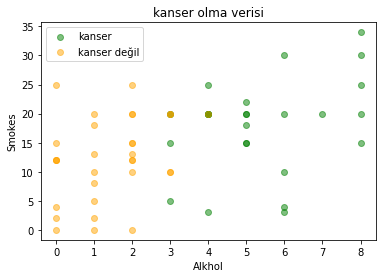

In [11]:
plt.scatter(kanser.Alkhol, kanser.Smokes, color='green',label="kanser",alpha=0.5)
plt.scatter(nokanser.Alkhol, nokanser.Smokes, color='orange',label="kanser değil",alpha=0.5)
plt.title("kanser olma verisi")
plt.xlabel("Alkhol")
plt.ylabel("Smokes")
plt.legend()

In [12]:
y=data.Result.values

In [13]:
y

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [14]:
data.head()

,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1


In [15]:
x_data=data.drop(["Result"],axis=1)

In [16]:
x_data.head()

,Age,Smokes,AreaQ,Alkhol
0,35,3,5,4
1,27,20,2,5
2,30,0,5,2
3,28,0,8,1
4,68,4,5,6


In [17]:
x = (x_data - np.min(x_data)) / ( np.max(x_data)-np.min(x_data) )

In [18]:
x.head()

,Age,Smokes,AreaQ,Alkhol
0,0.288136,0.088235,0.444444,0.500
1,0.152542,0.588235,0.111111,0.625
2,0.203390,0.000000,0.444444,0.250
3,0.169492,0.000000,0.777778,0.125
4,0.847458,0.117647,0.444444,0.750


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [20]:
from sklearn.svm import SVC

In [21]:
model=SVC(kernel='linear',C=1E10 ,random_state=1)

In [22]:
model.fit(x_train,y_train)

SVC(C=10000000000.0, kernel='linear', random_state=1)

In [23]:
print("olasılık = ",model.score(x_train,y_train))
print("olasılık = ",model.score(x_test,y_test))

olasılık =  1.0
olasılık =  0.9166666666666666


In [ ]:
model=SVC(kernel='rbf',C=1000, gamma=60)
#gamma 60 80 100 200

In [ ]:
model.fit(x_train,y_train)

SVC(C=1000, gamma=60)

In [ ]:
print("olasılık = ",model.score(x_train,y_train))
print("olasılık = ",model.score(x_test,y_test))

olasılık =  1.0
olasılık =  0.9166666666666666


In [ ]:
min_on_train=x_train.min(axis=0)

In [ ]:
range_on_training=(x_train-min_on_train).max(axis=0)

In [ ]:
x_train_scaled=(x_train-min_on_train)/range_on_training
x_test_scaled=(x_test-min_on_train)/range_on_training

In [ ]:
model=SVC(gamma='auto').fit(x_train_scaled,y_train )

In [ ]:
print("olasılık = ",model.score(x_train_scaled,y_train))
print("olasılık = ",model.score(x_test_scaled,y_test))

olasılık =  0.9787234042553191
olasılık =  1.0


In [ ]:
model=SVC(C=1000, gamma=80).fit(x_train_scaled,y_train )
print("olasılık = ",model.score(x_train_scaled,y_train))
print("olasılık = ",model.score(x_test_scaled,y_test))
#c= 1,10,1000

olasılık =  1.0
olasılık =  0.75
